## Data Scraping for Toronto Data

In [30]:
import requests

In [31]:
from lxml import html

In [32]:
response = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')


In [33]:
doc=html.fromstring(response.content)

In [118]:
doc

<Element html at 0x7ff2c5acb908>

In [34]:
tr_elements = doc.xpath('//tr')

In [89]:
[len(T) for T in tr_elements[:12]]

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [35]:
tr_elements = doc.xpath('//tr')
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    #print (i)
    #print (name)
    col.append((name,[]))
print(col)

[('Postcode', []), ('Borough', []), ('Neighbourhood\n', [])]


In [36]:
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 3, the //tr data is not from our table 
    if len(T)!=3:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [13]:
print(col)

[('Postcode', ['M1A', 'M2A', 'M3A', 'M4A', 'M5A', 'M5A', 'M6A', 'M6A', 'M7A', 'M8A', 'M9A', 'M1B', 'M1B', 'M2B', 'M3B', 'M4B', 'M4B', 'M5B', 'M5B', 'M6B', 'M7B', 'M8B', 'M9B', 'M9B', 'M9B', 'M9B', 'M9B', 'M1C', 'M1C', 'M1C', 'M2C', 'M3C', 'M3C', 'M4C', 'M5C', 'M6C', 'M7C', 'M8C', 'M9C', 'M9C', 'M9C', 'M9C', 'M1E', 'M1E', 'M1E', 'M2E', 'M3E', 'M4E', 'M5E', 'M6E', 'M7E', 'M8E', 'M9E', 'M1G', 'M2G', 'M3G', 'M4G', 'M5G', 'M6G', 'M7G', 'M8G', 'M9G', 'M1H', 'M2H', 'M3H', 'M3H', 'M3H', 'M4H', 'M5H', 'M5H', 'M5H', 'M6H', 'M6H', 'M7H', 'M8H', 'M9H', 'M1J', 'M2J', 'M2J', 'M2J', 'M3J', 'M3J', 'M4J', 'M5J', 'M5J', 'M5J', 'M6J', 'M6J', 'M7J', 'M8J', 'M9J', 'M1K', 'M1K', 'M1K', 'M2K', 'M3K', 'M3K', 'M4K', 'M4K', 'M5K', 'M5K', 'M6K', 'M6K', 'M6K', 'M7K', 'M8K', 'M9K', 'M1L', 'M1L', 'M1L', 'M2L', 'M2L', 'M3L', 'M4L', 'M4L', 'M5L', 'M5L', 'M6L', 'M6L', 'M6L', 'M7L', 'M8L', 'M9L', 'M1M', 'M1M', 'M1M', 'M2M', 'M2M', 'M3M', 'M4M', 'M5M', 'M5M', 'M6M', 'M6M', 'M6M', 'M6M', 'M7M', 'M8M', 'M9M', 'M9M', 'M1N'

In [37]:
[len(C) for (title,C) in col]

[288, 288, 288]

In [38]:
import pandas as pd

In [39]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

In [95]:
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned\n
1,M2A,Not assigned,Not assigned\n
2,M3A,North York,Parkwoods\n
3,M4A,North York,Victoria Village\n
4,M5A,Downtown Toronto,Harbourfront\n


In [96]:
df.shape

(288, 3)

## Data formatting

In [40]:
import numpy as np

## Steps to drop columns with Borough = 'Not Assigned'

In [41]:
df['Borough'].replace('Not assigned', np.nan, inplace=True)

In [42]:
df.dropna(subset=["Borough"], axis=0, inplace=True)

In [43]:
df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods\n
3,M4A,North York,Victoria Village\n
4,M5A,Downtown Toronto,Harbourfront\n
5,M5A,Downtown Toronto,Regent Park\n
6,M6A,North York,Lawrence Heights\n


## Reset index as few rows are dropped

In [44]:
df.reset_index(drop=True, inplace=True)

In [101]:
df.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods\n
1,M4A,North York,Victoria Village\n
2,M5A,Downtown Toronto,Harbourfront\n
3,M5A,Downtown Toronto,Regent Park\n
4,M6A,North York,Lawrence Heights\n


## Steps to remove the newline character (\n) from Neighbourhood column

In [45]:
print(df.columns)

Index(['Postcode', 'Borough', 'Neighbourhood\n'], dtype='object')


In [46]:
df.rename(columns ={"Neighbourhood\n":"Neighbourhood"},inplace=True)
print(df.columns)
#df['Neighbourhood\n']

Index(['Postcode', 'Borough', 'Neighbourhood'], dtype='object')


In [47]:
df['Neighbourhood'] = df['Neighbourhood'].str.replace(r'\n', '')


In [48]:
df.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights


## Steps to replace Neighbourhood will Borough for those rows with Neighbourhood as 'Not Assigned'

In [49]:
df['Neighbourhood'].replace('Not assigned', df['Borough'], inplace=True)

## Group by Postcode, Borough

In [50]:
df_temp = df
#df=df_temp
df.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights


In [51]:
df = df.groupby(['Postcode','Borough']) ['Neighbourhood'].apply(lambda x: ','.join(x)).reset_index()
 

In [123]:
df.head(50)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


## Find dataframe size

In [52]:
df.shape

(103, 3)

## Fetch geographical co-ordinates of each PO code from CSV

In [53]:
filename = "http://cocl.us/Geospatial_data"

In [54]:
df_ll = pd.read_csv(filename) 

In [55]:
df_ll.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [56]:
df_ll.rename(columns ={"Postal Code":"Postcode"},inplace=True)

In [57]:
df_ll.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


## Merge df and df_ll to get the desired DF.

In [58]:
df_master = pd.merge(df, df_ll, how='inner', on = 'Postcode')

In [118]:
df_master.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


## Map creation for Toronto

In [59]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [60]:
address = 'City of Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of City of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of City of Toronto are 43.7170226, -79.4197830350134.


In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: \ 

## Generate map for Toronto

In [61]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_master['Latitude'], df_master['Longitude'], df_master['Borough'], df_master['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

NameError: name 'folium' is not defined

### Based on web details, Scarborough is the best Borough in Toronto to start a living. Hence, data corresponding to Scarborough alone is fetched.

In [125]:
Scarborough_data = df_master[df_master['Borough'] == 'Scarborough'].reset_index(drop=True)
Scarborough_data.head(20)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


## Defining Four square credentials

In [126]:
#@hidden-cell
CLIENT_ID = 'UDZ2T4BRLYU0BKR4D4JUQYACLRIH3O2WBPUVRRAKIH53PHU5' # your Foursquare ID
CLIENT_SECRET = 'OESGQM2BESOU1WXQETB4MDR3YMK2MYGO315BP1SHNBLTBPDW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version



#### Test to check if Foursquare API works. 

In [127]:
Scarborough_data.loc[0, 'Neighbourhood']

'Rouge,Malvern'

In [128]:
neighborhood_latitude = Scarborough_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude =Scarborough_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Scarborough_data.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rouge,Malvern are 43.806686299999996, -79.19435340000001.


In [130]:
#@hidden-cell
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=UDZ2T4BRLYU0BKR4D4JUQYACLRIH3O2WBPUVRRAKIH53PHU5&client_secret=OESGQM2BESOU1WXQETB4MDR3YMK2MYGO315BP1SHNBLTBPDW&v=20180605&ll=43.806686299999996,-79.19435340000001&radius=500&limit=100'

In [3]:
results = requests.get(url).json()

NameError: name 'requests' is not defined

In [55]:
results

{'meta': {'code': 200, 'requestId': '5d4d4bac9ba3e50032646944'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 43.8111863045, 'lng': -79.18812958073042},
   'sw': {'lat': 43.80218629549999, 'lng': -79.2005772192696}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6b9446edc76b0d771311c',
       'name': "Wendy's",
       'location': {'crossStreet': 'Morningside & Sheppard',
        'lat': 43.80744841934756,
        'lng': -79.19905558052072,
        'labeledLatLngs': [{'label': 'display'

In [132]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [133]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


In [134]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Wendy's,Fast Food Restaurant,43.807448,-79.199056


## Get Nearby venues of Scarborough

In [135]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [136]:
Toronto_venues = getNearbyVenues(names=Scarborough_data['Neighbourhood'],
                                   latitudes=Scarborough_data['Latitude'],
                                   longitudes=Scarborough_data['Longitude']
                                  )



Rouge,Malvern
Highland Creek,Rouge Hill,Port Union
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park,Ionview,Kennedy Park
Clairlea,Golden Mile,Oakridge
Cliffcrest,Cliffside,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Scarborough Town Centre,Wexford Heights
Maryvale,Wexford
Agincourt
Clarks Corners,Sullivan,Tam O'Shanter
Agincourt North,L'Amoreaux East,Milliken,Steeles East
L'Amoreaux West
Upper Rouge


In [137]:
#print(Toronto_venues.shape)
#Toronto_venues.head(83)
#Scarborough_data.shape
#Toronto_venues.groupby(['Neighborhood','Venue Category']).count()
Scarborough_data.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


## Scarborough map with neighbourhoods marked

In [138]:
address = 'Scarborough,Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of City of Scarborough are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of City of Scarborough are 43.773077, -79.257774.


In [139]:
# create map of New York using latitude and longitude values
map_scarborough = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Scarborough_data['Latitude'], Scarborough_data['Longitude'], Scarborough_data['Borough'], Scarborough_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_scarborough)  
    
map_scarborough

## For venue Plot 

In [153]:
#Scarborough_venue = Toronto_venues.groupby('Neighborhood').count()
Scarborough_venue.head(16)
#Scarborough_venue.drop("Venue",axis=1,inplace=True)
#Scarborough_venue.drop("Venue Longitude",axis=1,inplace=True)
#Scarborough_venue.rename(columns ={"Neighborhood Longitude":"Count"},inplace=True)
#Scarborough_venue.shape
#neighbourcode=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
#Scarborough_venue['ncode']=neighbourcode

,Count,ncode
Neighborhood,,
Agincourt,4,0
"Agincourt North,L'Amoreaux East,Milliken,Steeles East",2,1
"Birch Cliff,Cliffside West",4,2
Cedarbrae,8,3
"Clairlea,Golden Mile,Oakridge",9,4
"Clarks Corners,Sullivan,Tam O'Shanter",10,5
"Cliffcrest,Cliffside,Scarborough Village West",2,6
"Dorset Park,Scarborough Town Centre,Wexford Heights",6,7
"East Birchmount Park,Ionview,Kennedy Park",4,8


In [22]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


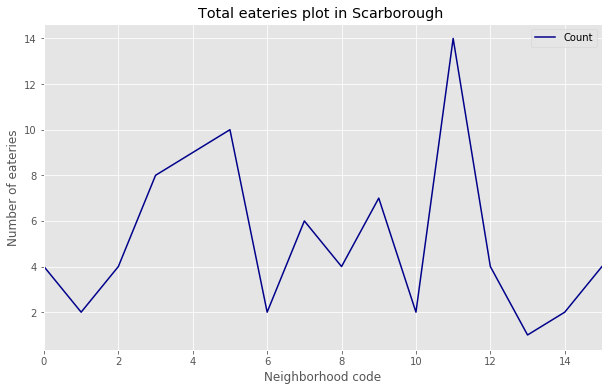

In [154]:
Scarborough_venue.plot(kind='line', x='ncode', y='Count', figsize=(10, 6), color='darkblue')

plt.title('Total eateries plot in Scarborough ')
plt.xlabel('Neighborhood code')
plt.ylabel('Number of eateries')

plt.show()

In [155]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 51 uniques categories.


## Revenue analysis

In [177]:
#@hidden-cell
r1=[2013,
2014,
2015,
2016,
2017,
2018,
   ]
df_rev_s=pd.DataFrame(r1)
df_rev_s.head(10)


,0
0,2013
1,2014
2,2015
3,2016
4,2017
5,2018


In [178]:
#@hidden-cell
y1=[30,
45.2,
53.4,
55.6,
60,
60.5]
df_rev_s['revenue']= y1

In [179]:
#@hidden-cell
df_rev_s.head(10)

,0,revenue
0,2013,30.0
1,2014,45.2
2,2015,53.4
3,2016,55.6
4,2017,60.0
5,2018,60.5


In [180]:
#@hidden-cell
print(df_rev_s.columns)

Index([0, 'revenue'], dtype='object')


In [160]:
#@hidden-cell
df_rev_s.rename(columns ={0:"Year"},inplace=True)

In [181]:
#@hidden-cell
df_dsn=df_rev_s.transpose()

In [182]:
#@hidden-cell
df_dsn.head()

,0,1,2,3,4,5
0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
revenue,30.0,45.2,53.4,55.6,60.0,60.5


In [ ]:
### DNR
URL='REV_SC.csv'
df_rev_s = pd.read_csv(URL)

In [163]:
!conda install -c anaconda seaborn --yes

# import library
import seaborn as sns

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.5.15  |                1         134 KB  anaconda
    seaborn-0.9.0              |           py36_0         379 KB  anaconda
    certifi-2019.6.16          |           py36_1         156 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ------------------------------------------------------------
                                           Total:         5.7 MB

The following packages will be UPDATED:

    certifi:         2019.6.16-py36_1     conda-forge --> 2019.6.16-py36_1 anaconda
    openssl:         1.1.1c-h516909a_0    conda-forge --> 1.1.1-h7b6447c_0 anaconda
    seaborn:         0.9.0-py36_0                     --> 0.9.0-py36_0     an

Text(0.5, 1.0, 'Restaurants Revenue report from 2013-2018 ')

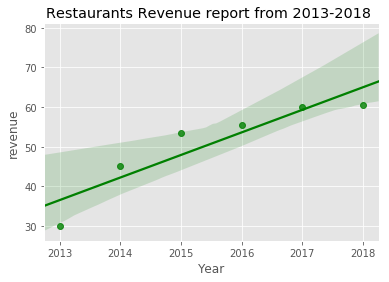

In [164]:
ax = sns.regplot(x='Year', y='revenue', data=df_rev_s, color='green') 
ax.set_title('Restaurants Revenue report from 2013-2018 ')

## Prediction using Linear Regression

In [165]:
from sklearn import linear_model

In [166]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(df_rev_s[['Year']])
train_y = np.asanyarray(df_rev_s[['revenue']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[5.68857143]]
Intercept:  [-11414.53238095]


Text(0.5, 1.0, 'Plot OP using fitted line')

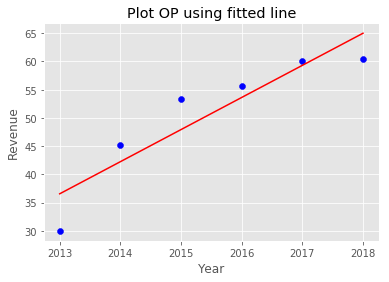

In [168]:
plt.scatter(df_rev_s.Year, df_rev_s.revenue,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Plot OP using fitted line")

In [169]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(df_rev_s[['Year']])
test_y = np.asanyarray(df_rev_s[['revenue']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 3.69
Residual sum of squares (MSE): 17.71
R2-score: 0.81


   ## Classification model - KNN

In [170]:
#@hidden-cell
n1= ['Rouge,Malvern',
'Highland Creek,Rouge Hill,Port Union',
'Guildwood,Morningside,West Hill',
'Woburn',
'Cedarbrae',
'Scarborough Village',
'East Birchmount Park,Ionview,Kennedy Park',
'Clairlea,Golden Mile,Oakridge',
'Cliffcrest,Cliffside,Scarborough Village West',
'Birch Cliff,Cliffside West',
'Dorset Park,Scarborough Town Centre,Wexford Heights',
'Maryvale,Wexford',
'Agincourt',
'Clarks Corners,Sullivan,Tam O Shanter',
'Agincourt North,L Amoreaux East,Milliken,Steeles East',
'L Amoreaux West',
'Upper Rouge']

In [171]:
#@hidden-cell
df_n_cl1 = pd.DataFrame(n1)
df_n_cl1.shape

(17, 1)

In [172]:
#@hidden-cell
nc=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
df_n_cl1['nc_code'] = nc

In [173]:
#@hidden-cell
n2=[7,
2,
5,
4,
6,
2,
8,
1,
4,
3,
8,
2,
3,
6,
4,
1,
0
]
df_n_cl1['org_prod'] = n2

In [174]:
#@hidden-cell
n3=[6,
4,
7,
4,
5,
8,
2,
8,
3,
3,
6,
7,
5,
5,
4,
4,
8
]
df_n_cl1['work_class']=n3

In [175]:
#@hidden-cell
custcat = [3,
2,
1,
3,
2,
1,
1,
1,
1,
3,
3,
2,
2,
1,
2,
3,
1
]
df_n_cl1['custcat']=custcat

In [ ]:
### DNR 
url="SC_CL.csv"
df_n_cl1 = pd.read_csv(url)

In [184]:
df_n_cl1.head()

,0,nc_code,org_prod,work_class,custcat
0,"Rouge,Malvern",0,7,6,3
1,"Highland Creek,Rouge Hill,Port Union",1,2,4,2
2,"Guildwood,Morningside,West Hill",2,5,7,1
3,Woburn,3,4,4,3
4,Cedarbrae,4,6,5,2


In [185]:
df_n_cl1.rename(columns ={0:"Neighborhood"},inplace=True)

In [186]:
X=df_n_cl1[['org_prod','work_class']]
X

,org_prod,work_class
0,7,6
1,2,4
2,5,7
3,4,4
4,6,5
5,2,8
6,8,2
7,1,8
8,4,3
9,3,3


In [49]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [43]:
X

array([[-1.63299316,  1.30005091,  0.41740484],
       [-1.42886902, -0.7849364 , -0.67426936],
       [-1.22474487,  0.46605599,  0.96324195],
       [-1.02062073,  0.04905852, -0.67426936],
       [-0.81649658,  0.88305345, -0.12843226],
       [-0.61237244, -0.7849364 ,  1.50907905],
       [-0.40824829,  1.71704837, -1.76594357],
       [-0.20412415, -1.20193386,  1.50907905],
       [ 0.        ,  0.04905852, -1.22010647],
       [ 0.20412415, -0.36793894, -1.22010647],
       [ 0.40824829,  1.71704837,  0.41740484],
       [ 0.61237244, -0.7849364 ,  0.96324195],
       [ 0.81649658, -0.36793894, -0.12843226],
       [ 1.02062073,  0.88305345, -0.12843226],
       [ 1.22474487,  0.04905852, -0.67426936],
       [ 1.42886902, -1.20193386, -0.67426936],
       [ 1.63299316, -1.61893132,  1.50907905]])

In [35]:
Y=df_n_cl1['custcat']
Y

0     3
1     2
2     1
3     3
4     2
5     1
6     1
7     1
8     1
9     3
10    3
11    2
12    2
13    1
14    2
15    3
16    1
Name: custcat, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (13, 2) (13,)
Test set: (4, 2) (4,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])




In [52]:
std_acc
mean_acc

array([0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

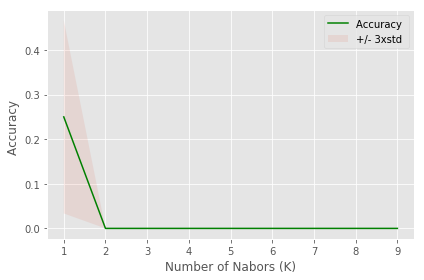

In [54]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### KNN metrics

In [55]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [60]:
#Predict the value for K=1
k = 1
#Train Model and Predict  
neigh_t = KNeighborsClassifier(n_neighbors = k).fit(X_test,y_test)
neigh_t

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [62]:
yhat = neigh_t.predict(X_test)

In [63]:
#Jaccard score
j_knn = jaccard_similarity_score(y_test, yhat)  
j_knn

1.0

In [64]:
#F1_score
f1_knn = f1_score(y_test, yhat,average='weighted')  
f1_knn

1.0

## Analyze each neighbourhood

In [188]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Neighborhood,American Restaurant,Athletics & Sports,Bakery,Bank,Bar,Breakfast Spot,Bubble Tea Shop,Bus Line,Bus Station,...,Pharmacy,Pizza Place,Playground,Rental Car Location,Sandwich Place,Skating Rink,Smoke Shop,Soccer Field,Thai Restaurant,Vietnamese Restaurant
0,"Rouge,Malvern",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Highland Creek,Rouge Hill,Port Union",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Highland Creek,Rouge Hill,Port Union",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Guildwood,Morningside,West Hill",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"Guildwood,Morningside,West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
Toronto_onehot.shape

(83, 52)

In [190]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
#Toronto_grouped

In [107]:
Toronto_grouped.shape

(16, 52)

## Fetch top 5 common venues

In [191]:
num_top_venues = 5

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp =Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                 venue  freq
0               Lounge  0.25
1       Breakfast Spot  0.25
2         Skating Rink  0.25
3       Clothing Store  0.25
4  American Restaurant  0.00


----Agincourt North,L'Amoreaux East,Milliken,Steeles East----
                       venue  freq
0                       Park   0.5
1                 Playground   0.5
2               Noodle House   0.0
3          Korean Restaurant   0.0
4  Latin American Restaurant   0.0


----Birch Cliff,Cliffside West----
                   venue  freq
0           Skating Rink  0.25
1  General Entertainment  0.25
2                   Café  0.25
3        College Stadium  0.25
4    American Restaurant  0.00


----Cedarbrae----
                venue  freq
0              Lounge  0.12
1              Bakery  0.12
2                Bank  0.12
3     Thai Restaurant  0.12
4  Athletics & Sports  0.12


----Clairlea,Golden Mile,Oakridge----
          venue  freq
0      Bus Line  0.22
1        Bakery  0.11
2  Intersection  

In [192]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [193]:
neighborhoods_venues_sorted=[]
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Clothing Store,Skating Rink,Breakfast Spot,Lounge,Vietnamese Restaurant,General Entertainment,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Department Store
1,"Agincourt North,L'Amoreaux East,Milliken,Steel...",Playground,Park,Vietnamese Restaurant,Chinese Restaurant,General Entertainment,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Department Store,Cosmetics Shop
2,"Birch Cliff,Cliffside West",General Entertainment,Skating Rink,Café,College Stadium,Vietnamese Restaurant,Clothing Store,Grocery Store,Fried Chicken Joint,Fast Food Restaurant,Electronics Store
3,Cedarbrae,Thai Restaurant,Athletics & Sports,Bakery,Bank,Fried Chicken Joint,Lounge,Caribbean Restaurant,Hakka Restaurant,Convenience Store,Grocery Store
4,"Clairlea,Golden Mile,Oakridge",Bus Line,Soccer Field,Bakery,Intersection,Fast Food Restaurant,Bus Station,Park,Metro Station,Vietnamese Restaurant,Coffee Shop


## Cluster Neighborhoods

In [195]:
from sklearn.cluster import KMeans 

In [196]:
# set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 1, 1, 1, 4, 1, 1, 1], dtype=int32)

## K means on a randomly generated dataset

In [200]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#Toronto_merged = Scarborough_data

#Toronto_merged.head()
neighborhoods_venues_sorted.head()
Toronto_merged.rename(columns ={"Neighbourhood":"Neighborhood"},inplace=True)
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353,2.0,Fast Food Restaurant,Vietnamese Restaurant,Clothing Store,Grocery Store,General Entertainment,Fried Chicken Joint,Electronics Store,Department Store,Cosmetics Shop,Convenience Store
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,3.0,Moving Target,Bar,Vietnamese Restaurant,Grocery Store,General Entertainment,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Department Store,Cosmetics Shop
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,1.0,Intersection,Electronics Store,Rental Car Location,Breakfast Spot,Pizza Place,Medical Center,Mexican Restaurant,Vietnamese Restaurant,Coffee Shop,Fried Chicken Joint
3,M1G,Scarborough,Woburn,43.770992,-79.216917,1.0,Coffee Shop,Korean Restaurant,Pharmacy,Vietnamese Restaurant,Clothing Store,General Entertainment,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Department Store
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,1.0,Thai Restaurant,Athletics & Sports,Bakery,Bank,Fried Chicken Joint,Lounge,Caribbean Restaurant,Hakka Restaurant,Convenience Store,Grocery Store


In [201]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


In [202]:
Toronto_merged['Cluster Labels']

0     2.0
1     3.0
2     1.0
3     1.0
4     1.0
5     0.0
6     1.0
7     1.0
8     4.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    0.0
15    1.0
16    NaN
Name: Cluster Labels, dtype: float64

In [204]:
Toronto_merged['Cluster Labels'].replace(np.nan,0.0, inplace=True)
Toronto_merged['Cluster Labels'] = pd.to_numeric(Toronto_merged['Cluster Labels'],downcast='integer')
#pd.to_numeric(s, downcast='integer')
Toronto_merged['Cluster Labels'] = Toronto_merged['Cluster Labels'].astype('int32')

In [205]:
Toronto_merged['Cluster Labels'] 

0     2
1     3
2     1
3     1
4     1
5     0
6     1
7     1
8     4
9     1
10    1
11    1
12    1
13    1
14    0
15    1
16    0
Name: Cluster Labels, dtype: int32

In [206]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'],Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
       fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

### Cluster 1

In [138]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0,Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,0,Playground,Convenience Store,Vietnamese Restaurant,Clothing Store,Grocery Store,General Entertainment,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Department Store
14,Scarborough,0,Playground,Park,Vietnamese Restaurant,Chinese Restaurant,General Entertainment,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Department Store,Cosmetics Shop
16,Scarborough,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cluster 2

In [139]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1,Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Scarborough,1,Intersection,Electronics Store,Rental Car Location,Breakfast Spot,Pizza Place,Medical Center,Mexican Restaurant,Vietnamese Restaurant,Coffee Shop,Fried Chicken Joint
3,Scarborough,1,Coffee Shop,Korean Restaurant,Pharmacy,Vietnamese Restaurant,Clothing Store,General Entertainment,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Department Store
4,Scarborough,1,Thai Restaurant,Athletics & Sports,Bakery,Bank,Fried Chicken Joint,Lounge,Caribbean Restaurant,Hakka Restaurant,Convenience Store,Grocery Store
6,Scarborough,1,Chinese Restaurant,Department Store,Coffee Shop,Hobby Shop,Clothing Store,Grocery Store,General Entertainment,Fried Chicken Joint,Fast Food Restaurant,Electronics Store
7,Scarborough,1,Bus Line,Soccer Field,Bakery,Intersection,Fast Food Restaurant,Bus Station,Park,Metro Station,Vietnamese Restaurant,Coffee Shop
9,Scarborough,1,General Entertainment,Skating Rink,Café,College Stadium,Vietnamese Restaurant,Clothing Store,Grocery Store,Fried Chicken Joint,Fast Food Restaurant,Electronics Store
10,Scarborough,1,Indian Restaurant,Pet Store,Chinese Restaurant,Latin American Restaurant,Vietnamese Restaurant,Sandwich Place,Soccer Field,Fried Chicken Joint,Fast Food Restaurant,Electronics Store
11,Scarborough,1,Smoke Shop,Bakery,Breakfast Spot,Middle Eastern Restaurant,Vietnamese Restaurant,Coffee Shop,General Entertainment,Fried Chicken Joint,Fast Food Restaurant,Electronics Store
12,Scarborough,1,Clothing Store,Skating Rink,Breakfast Spot,Lounge,Vietnamese Restaurant,General Entertainment,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Department Store
13,Scarborough,1,Pizza Place,Fried Chicken Joint,Thai Restaurant,Bank,Fast Food Restaurant,Italian Restaurant,Pharmacy,Noodle House,Chinese Restaurant,Vietnamese Restaurant


### Cluster 3

In [140]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2,Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,2,Fast Food Restaurant,Vietnamese Restaurant,Clothing Store,Grocery Store,General Entertainment,Fried Chicken Joint,Electronics Store,Department Store,Cosmetics Shop,Convenience Store


# Analysis for NY data

In [16]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [7]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

ModuleNotFoundError: No module named 'folium'

In [17]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [18]:
neighborhoods_data = newyork_data['features']

In [19]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [20]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [21]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [22]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [214]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## Based on web details, Manhattan is the ideal location in NY. Hence, retrieving the data for Manhattan alone

In [23]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [24]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


In [217]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [25]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

In [29]:
# @hidden-cell
CLIENT_ID = 'UDZ2T4BRLYU0BKR4D4JUQYACLRIH3O2WBPUVRRAKIH53PHU5' # your Foursquare ID
CLIENT_SECRET = 'OESGQM2BESOU1WXQETB4MDR3YMK2MYGO315BP1SHNBLTBPDW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UDZ2T4BRLYU0BKR4D4JUQYACLRIH3O2WBPUVRRAKIH53PHU5
CLIENT_SECRET:OESGQM2BESOU1WXQETB4MDR3YMK2MYGO315BP1SHNBLTBPDW


In [26]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [32]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3320, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [34]:
manhattan_v = manhattan_venues.groupby('Neighborhood').count()

In [46]:
 
manhattan_v.head(40)
#manhattan_v.drop("Venue",axis=1,inplace=True)
#manhattan_v.drop("Venue Category",axis=1,inplace=True)
#manhattan_v.rename(columns ={"Neighborhood Latitude":"Count"},inplace=True)
#manhattan_v.shape
#neighbourcode=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]
#manhattan_v['ncode']=neighbourcode

,Count,ncode
Neighborhood,,
Battery Park City,100,0
Carnegie Hill,100,1
Central Harlem,44,2
Chelsea,100,3
Chinatown,100,4
Civic Center,100,5
Clinton,100,6
East Harlem,46,7
East Village,100,8


In [47]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


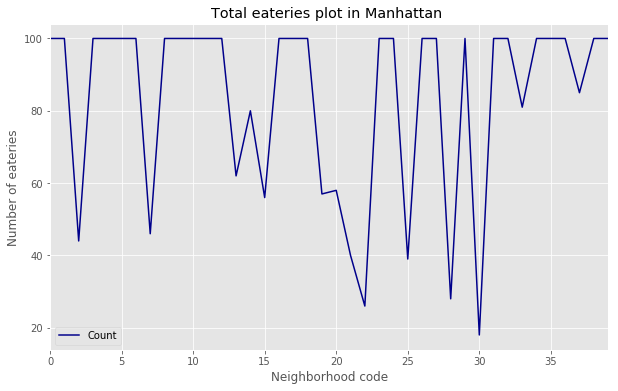

In [48]:
manhattan_v.plot(kind='line', x='ncode', y='Count', figsize=(10, 6), color='darkblue')

plt.title('Total eateries plot in Manhattan ')
plt.xlabel('Neighborhood code')
plt.ylabel('Number of eateries')

plt.show()

## Revenue Analysis

In [53]:
# @hidden-cell
import pandas as pd
Year = [2013,2014,2015,2016,2017,2018]
df_mh_rev=pd.DataFrame(Year)

In [54]:
# @hidden-cell
rev=[50,
52,
45,
42,
40,
38
]
df_mh_rev['Revenue'] = rev

In [ ]:
# DNR
url='mh_rev.csv'
df_mh_rev = pd.read_csv(url)

In [58]:
df_mh_rev.rename(columns ={0:"Year"},inplace=True)

In [59]:
df_mh_rev.head()

,Year,Revenue
0,2013,50
1,2014,52
2,2015,45
3,2016,42
4,2017,40


## Revenue Plot with actual values

In [61]:
#!conda install -c anaconda seaborn --yes

# import library
import seaborn as sns

Text(0.5, 1.0, 'Restaurants Revenue report from 2013-2018 ')

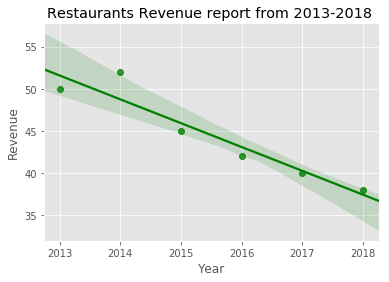

In [63]:
ax = sns.regplot(x='Year', y='Revenue', data=df_mh_rev, color='green') 
ax.set_title('Restaurants Revenue report from 2013-2018 ')

## Prediction using Linear Regression

In [64]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(df_mh_rev[['Year']])
train_y = np.asanyarray(df_mh_rev[['Revenue']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-2.82857143]]
Intercept:  [5745.48571429]


Text(0.5, 1.0, 'Plot OP using fitted line')

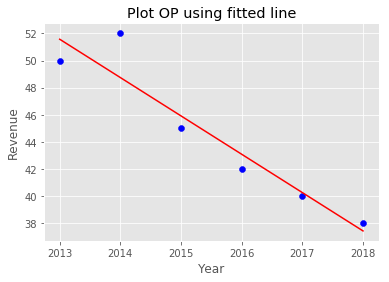

In [65]:
plt.scatter(df_mh_rev.Year, df_mh_rev.Revenue,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Plot OP using fitted line")

In [66]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(df_mh_rev[['Year']])
test_y = np.asanyarray(df_mh_rev[['Revenue']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 1.28
Residual sum of squares (MSE): 2.58
R2-score: 0.89


### Classification model - KNN

In [1]:
#@hidden-cell
n1= ['Marble Hill',
'Chinatown',
'Washington Heights',
'Inwood',
'Hamilton Heights',
'Manhattanville',
'Central Harlem',
'East Harlem',
'Upper East Side',
'Yorkville',
'Lenox Hill',
'Roosevelt Island',
'Upper West Side',
'Lincoln Square',
'Clinton',
'Midtown',
'Murray Hill',
'Chelsea',
'Greenwich Village',
'East Village',
'Lower East Side',
'Tribeca',
'Little Italy',
'Soho',
'West Village',
'Manhattan Valley',
'Morningside Heights',
'Gramercy',
'Battery Park City',
'Financial District',
'Carnegie Hill',
'Noho',
'Civic Center',
'Midtown South',
'Sutton Place',
'Turtle Bay',
'Tudor City',
'Stuyvesant Town',
'Flatiron',
'Hudson Yards'
    ]

In [3]:
#@hidden-cell
df_n_cl2 = pd.DataFrame(n1)
df_n_cl2.shape

(40, 1)

In [4]:
#@hidden-cell
nc=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,
   17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39
]
df_n_cl2['nc_code'] = nc

In [5]:
#@hidden-cell
n2=[7,
2,
5,
4,
6,
2,
8,
1,
4,
3,
8,
2,
3,
6,
4,
1,
0,
    4.5,
10,
3.9,
6.2,
8.1,
6,
3,
9,
10,
2.46,
5,
1.8,
4.2,
8.2,
1,
5.3,
8,
2,
4.5,
6.3,
7.2,
2,
5.5

]
df_n_cl2['org_prod'] = n2

In [6]:
#@hidden-cell
n3=[6,
4,
7,
4,
5,
8,
2,
8,
3,
3,
6,
7,
5,
5,
4,
4,
8,
3,
2,
1,
3,
2,
3,
2,
1,
3,
2,
4,
5,
8,
2,
8,
3,
2,
1,
2,
3,
1,
5,
4
    
]
df_n_cl2['work_class']=n3

In [7]:
#@hidden-cell
custcat = [3,
2,
1,
3,
2,
1,
1,
1,
1,
3,
3,
2,
2,
1,
2,
3,
1,
3,
2,
1,
3,
2,
1,
1,
1,
1,
3,
3,
2,
2,
1,
2,
3,
1,
1,
3,
2,
1,
2,
3

]
df_n_cl2['custcat']=custcat


In [ ]:
### DNR 
url="SC_CL.csv"
df_n_cl2 = pd.read_csv(url)

In [9]:
df_n_cl2.head()

,0,nc_code,org_prod,work_class,custcat
0,Marble Hill,0,7.0,6,3
1,Chinatown,1,2.0,4,2
2,Washington Heights,2,5.0,7,1
3,Inwood,3,4.0,4,3
4,Hamilton Heights,4,6.0,5,2


In [10]:
df_n_cl2.rename(columns ={0:"Neighborhood"},inplace=True)

In [11]:
X=df_n_cl2[['org_prod','work_class']]
X

,org_prod,work_class
0,7.00,6
1,2.00,4
2,5.00,7
3,4.00,4
4,6.00,5
5,2.00,8
6,8.00,2
7,1.00,8
8,4.00,3
9,3.00,3


In [12]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.85229219,  0.93661962],
       [-1.04506354,  0.01156321],
       [ 0.0933499 ,  1.39914783],
       [-0.28612124,  0.01156321],
       [ 0.47282105,  0.47409141],
       [-1.04506354,  1.86167604],
       [ 1.23176334, -0.91349321],
       [-1.42453468,  1.86167604],
       [-0.28612124, -0.450965  ],
       [-0.66559239, -0.450965  ],
       [ 1.23176334,  0.93661962],
       [-1.04506354,  1.39914783],
       [-0.66559239,  0.47409141],
       [ 0.47282105,  0.47409141],
       [-0.28612124,  0.01156321],
       [-1.42453468,  0.01156321],
       [-1.80400583,  1.86167604],
       [-0.09638567, -0.450965  ],
       [ 1.99070563, -0.91349321],
       [-0.32406836, -1.37602142],
       [ 0.54871528, -0.450965  ],
       [ 1.26971045, -0.91349321],
       [ 0.47282105, -0.450965  ],
       [-0.66559239, -0.91349321],
       [ 1.61123448, -1.37602142],
       [ 1.99070563, -0.450965  ],
       [-0.87050681, -0.91349321],
       [ 0.0933499 ,  0.01156321],
       [-1.12095776,

In [15]:
Y=df_n_cl2['custcat']
Y

0     3
1     2
2     1
3     3
4     2
5     1
6     1
7     1
8     1
9     3
10    3
11    2
12    2
13    1
14    2
15    3
16    1
17    3
18    2
19    1
20    3
21    2
22    1
23    1
24    1
25    1
26    3
27    3
28    2
29    2
30    1
31    2
32    3
33    1
34    1
35    3
36    2
37    1
38    2
39    3
Name: custcat, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (32, 2) (32,)
Test set: (8, 2) (8,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


In [20]:
std_acc
mean_acc

array([0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.5  , 0.5  , 0.375])

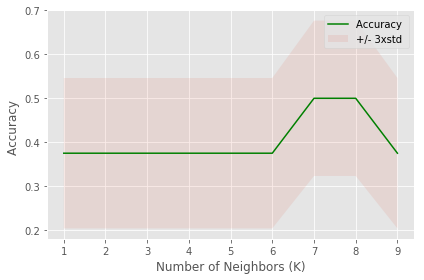

In [23]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### KNN metrics

In [27]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#Predict the value for K=1
k = 7
#Train Model and Predict  
neigh_t = KNeighborsClassifier(n_neighbors = k).fit(X_test,y_test)
neigh_t

yhat = neigh_t.predict(X_test)

In [28]:
#Jaccard score
j_knn = jaccard_similarity_score(y_test, yhat)  
j_knn

0.625

In [29]:
#F1_score
f1_knn = f1_score(y_test, yhat,average='weighted')  
f1_knn

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5892857142857143

### Analyze each neighborhood

In [225]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped['Neighbourhood']

NameError: name 'manhattan_onehot' is not defined

In [227]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
            venue  freq
0            Park  0.08
1     Coffee Shop  0.07
2           Hotel  0.05
3   Memorial Site  0.04
4  Clothing Store  0.03


----Carnegie Hill----
            venue  freq
0     Pizza Place  0.06
1     Coffee Shop  0.06
2  Cosmetics Shop  0.04
3            Café  0.04
4     Yoga Studio  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1   Chinese Restaurant  0.05
2  American Restaurant  0.05
3                  Bar  0.05
4           Public Art  0.05


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1  Italian Restaurant  0.05
2      Ice Cream Shop  0.05
3           Nightclub  0.04
4              Bakery  0.04


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.09
1           Cocktail Bar  0.05
2     Salon / Barbershop  0.04
3    American Restaurant  0.04
4  Vietnamese Restaurant  0.04


----Civic Center----
                  venue  freq
0    Italian Resta

In [228]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [229]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Gym,Clothing Store,Wine Shop,Italian Restaurant,Shopping Mall,Sushi Restaurant
1,Carnegie Hill,Coffee Shop,Pizza Place,Café,Cosmetics Shop,Yoga Studio,Japanese Restaurant,Bookstore,Bakery,French Restaurant,Grocery Store
2,Central Harlem,African Restaurant,Chinese Restaurant,French Restaurant,Public Art,American Restaurant,Bar,Cosmetics Shop,Art Gallery,Seafood Restaurant,Cycle Studio
3,Chelsea,Coffee Shop,Ice Cream Shop,Italian Restaurant,Nightclub,Bakery,Theater,Hotel,American Restaurant,Seafood Restaurant,Art Gallery
4,Chinatown,Chinese Restaurant,Cocktail Bar,Salon / Barbershop,American Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Spa,Bakery,Bubble Tea Shop


## Cluster Neighborhoods

In [230]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 2, 1, 2, 2, 0, 1, 1], dtype=int32)

In [231]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Sandwich Place,Coffee Shop,Discount Store,Yoga Studio,Supplement Shop,Steakhouse,Spa,Shopping Mall,Seafood Restaurant,Clothing Store
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,Salon / Barbershop,American Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Spa,Bakery,Bubble Tea Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Mobile Phone Shop,Grocery Store,Spanish Restaurant,Coffee Shop,Tapas Restaurant,Park,Deli / Bodega,Chinese Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,0,Café,Mexican Restaurant,Pizza Place,Lounge,Bakery,Pharmacy,Park,Restaurant,Chinese Restaurant,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Café,Mexican Restaurant,Coffee Shop,Park,Caribbean Restaurant,Chinese Restaurant,School,Bank,Bakery


In [232]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [234]:
# Cluster 1
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Mobile Phone Shop,Grocery Store,Spanish Restaurant,Coffee Shop,Tapas Restaurant,Park,Deli / Bodega,Chinese Restaurant
3,Inwood,Café,Mexican Restaurant,Pizza Place,Lounge,Bakery,Pharmacy,Park,Restaurant,Chinese Restaurant,Spanish Restaurant
4,Hamilton Heights,Pizza Place,Café,Mexican Restaurant,Coffee Shop,Park,Caribbean Restaurant,Chinese Restaurant,School,Bank,Bakery
5,Manhattanville,Park,Seafood Restaurant,Mexican Restaurant,Italian Restaurant,Coffee Shop,Liquor Store,Bike Trail,Climbing Gym,Grocery Store,Lounge
7,East Harlem,Mexican Restaurant,Deli / Bodega,Bakery,Latin American Restaurant,Thai Restaurant,Taco Place,Grocery Store,Coffee Shop,Cocktail Bar,Liquor Store
25,Manhattan Valley,Coffee Shop,Pizza Place,Bar,Deli / Bodega,Playground,Mexican Restaurant,Thai Restaurant,Yoga Studio,Café,Indian Restaurant
36,Tudor City,Mexican Restaurant,Café,Park,Pizza Place,Greek Restaurant,Deli / Bodega,Diner,Dog Run,Sushi Restaurant,Burger Joint


In [235]:
# Cluster 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Coffee Shop,Discount Store,Yoga Studio,Supplement Shop,Steakhouse,Spa,Shopping Mall,Seafood Restaurant,Clothing Store
1,Chinatown,Chinese Restaurant,Cocktail Bar,Salon / Barbershop,American Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Spa,Bakery,Bubble Tea Shop
6,Central Harlem,African Restaurant,Chinese Restaurant,French Restaurant,Public Art,American Restaurant,Bar,Cosmetics Shop,Art Gallery,Seafood Restaurant,Cycle Studio
9,Yorkville,Coffee Shop,Italian Restaurant,Gym,Bar,Sushi Restaurant,Pizza Place,Deli / Bodega,Wine Shop,Japanese Restaurant,Mexican Restaurant
10,Lenox Hill,Coffee Shop,Italian Restaurant,Sushi Restaurant,Pizza Place,Sporting Goods Shop,Burger Joint,Cosmetics Shop,Gym,Gym / Fitness Center,Thai Restaurant
11,Roosevelt Island,Park,Sandwich Place,Coffee Shop,Greek Restaurant,Farmers Market,Outdoors & Recreation,Supermarket,School,Scenic Lookout,Liquor Store
12,Upper West Side,Italian Restaurant,Wine Bar,Bar,Coffee Shop,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Bakery,Cosmetics Shop,Indian Restaurant,Seafood Restaurant
16,Murray Hill,Coffee Shop,Sandwich Place,Japanese Restaurant,Hotel,French Restaurant,Bar,Gym / Fitness Center,Italian Restaurant,Gym,Mediterranean Restaurant
19,East Village,Bar,Wine Bar,Chinese Restaurant,Pizza Place,Ice Cream Shop,Mexican Restaurant,Vegetarian / Vegan Restaurant,Ramen Restaurant,Coffee Shop,Cocktail Bar
20,Lower East Side,Coffee Shop,Café,Pizza Place,Bakery,Sandwich Place,Ramen Restaurant,Art Gallery,Chinese Restaurant,Japanese Restaurant,Cocktail Bar


In [236]:
# Cluster 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Upper East Side,Italian Restaurant,Exhibit,Art Gallery,Coffee Shop,Gym / Fitness Center,Bakery,French Restaurant,Cocktail Bar,Spa,Hotel
13,Lincoln Square,Gym / Fitness Center,Theater,Café,Concert Hall,Plaza,Italian Restaurant,Indie Movie Theater,Performing Arts Venue,Park,Opera House
14,Clinton,Theater,Gym / Fitness Center,American Restaurant,Italian Restaurant,Hotel,Coffee Shop,Wine Shop,Sandwich Place,Spa,Bar
15,Midtown,Hotel,Coffee Shop,Theater,Clothing Store,Cocktail Bar,Bakery,Bookstore,Sporting Goods Shop,Spa,Japanese Restaurant
17,Chelsea,Coffee Shop,Ice Cream Shop,Italian Restaurant,Nightclub,Bakery,Theater,Hotel,American Restaurant,Seafood Restaurant,Art Gallery
18,Greenwich Village,Italian Restaurant,Clothing Store,Sushi Restaurant,French Restaurant,Cosmetics Shop,Chinese Restaurant,Seafood Restaurant,Café,Indian Restaurant,Coffee Shop
21,Tribeca,Park,Café,Italian Restaurant,American Restaurant,Boutique,Spa,Wine Bar,Wine Shop,Greek Restaurant,Coffee Shop
22,Little Italy,Bakery,Café,Mediterranean Restaurant,Clothing Store,Sandwich Place,Italian Restaurant,Salon / Barbershop,Bubble Tea Shop,Massage Studio,Ice Cream Shop
23,Soho,Clothing Store,Boutique,Art Gallery,Shoe Store,Women's Store,Italian Restaurant,Sporting Goods Shop,Furniture / Home Store,Bakery,Men's Store
24,West Village,Italian Restaurant,Cosmetics Shop,New American Restaurant,Cocktail Bar,American Restaurant,Park,Wine Bar,Jazz Club,Speakeasy,Bakery
